# Plotting

Python have a very rich plotting library ecosystem:

* **Matplotlib**: *low level* principal plotting library of python
* **Pandas plotting tools**: handy wrapper around matplotlib objects
* **Seaborn**: Statistic ploting ( also a wrapper of matplotlib )

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')

In [2]:
df = sns.load_dataset("iris")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
np.unique(df.species)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Plotting with Pandas

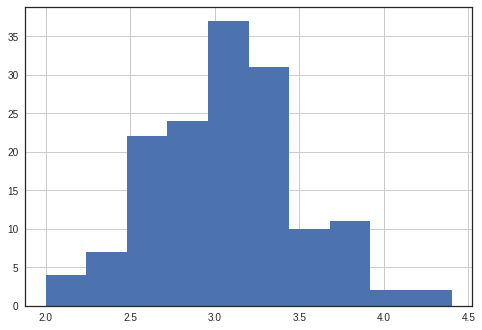

In [5]:
df['sepal_width'].hist()

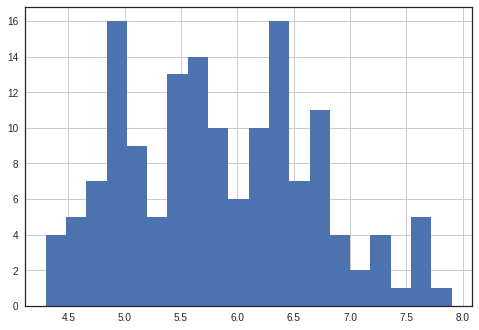

In [6]:
df.sepal_length.hist(bins=20)

Sometimes is not straightforward to find the formula for ploting options

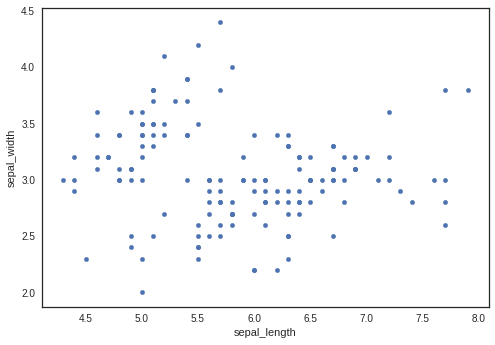

In [10]:
df.plot.scatter(x='sepal_length', y='sepal_width')

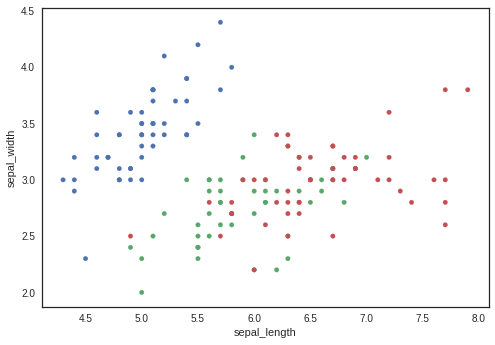

In [12]:
cols = {'setosa':'C0', 'versicolor':'C1', 'virginica':'C2'}
colors = df.species.map(cols)
df.plot.scatter(x='sepal_length', y='sepal_width', c=colors)

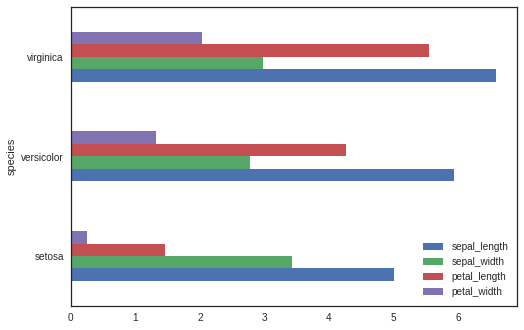

In [19]:
df.groupby(by='species').mean().plot.barh()

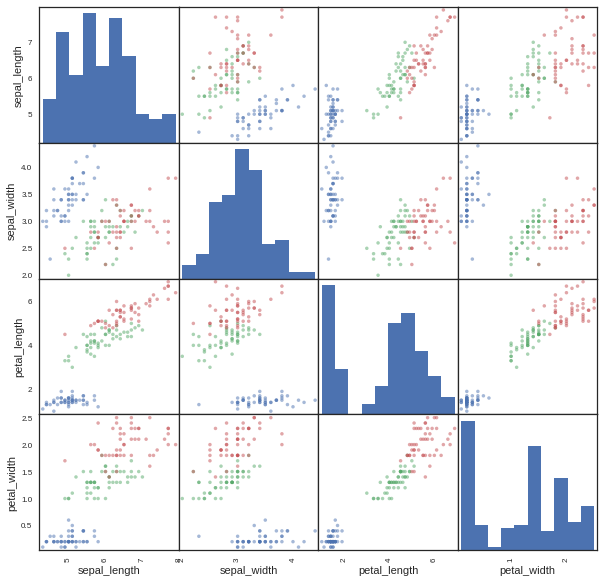

In [13]:
pd.plotting.scatter_matrix(df, figsize=(10,10), diagonal='hist', c=colors)

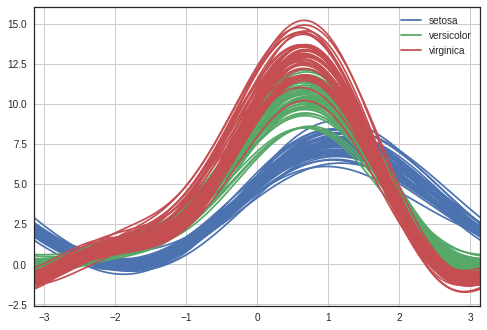

In [16]:
pd.plotting.andrews_curves(df, class_column='species', color=('C0','C1','C2'))

## Plotting with seaborn

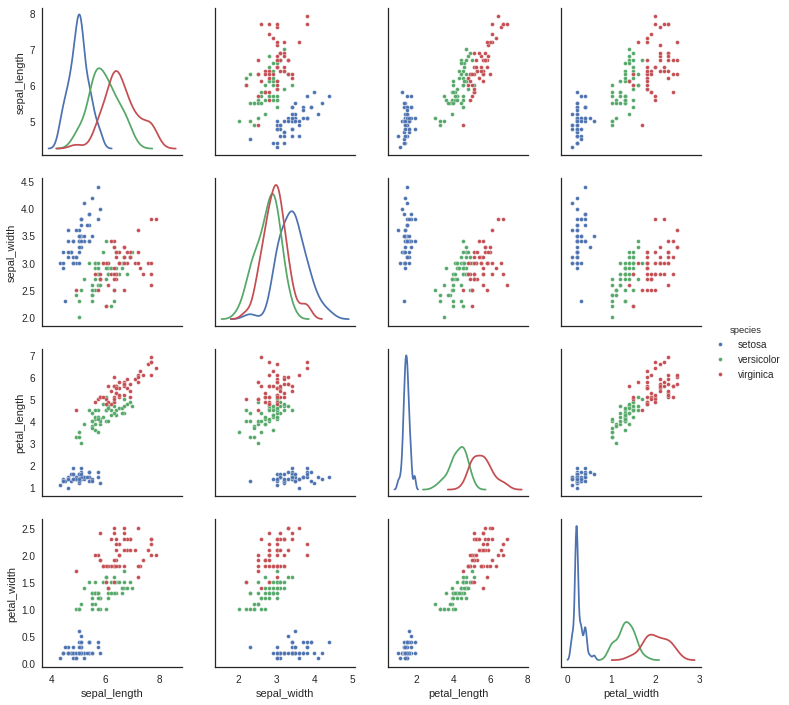

In [6]:
sns.pairplot(df, hue='species', diag_kind='kde', plot_kws=dict(s=15))

/home/biel/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


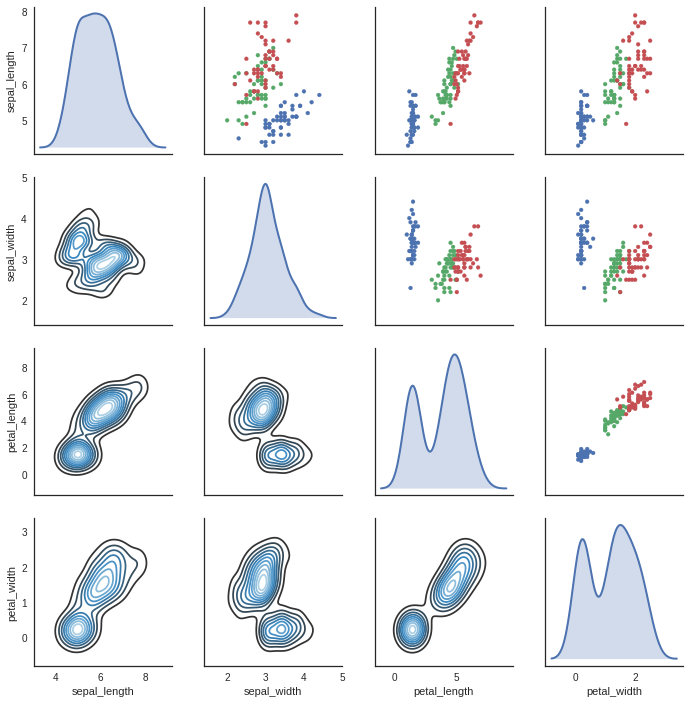

In [33]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter, color = colors, s = 15)
g.map_diag(sns.kdeplot, lw=2, shade=True)

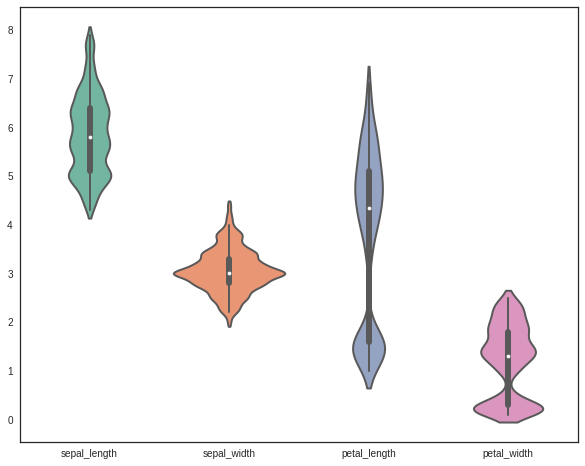

In [41]:
plt.figure(figsize=(10,8))
sns.violinplot(data=df, palette="Set2", bw=.2, cut=1, linewidth=2)

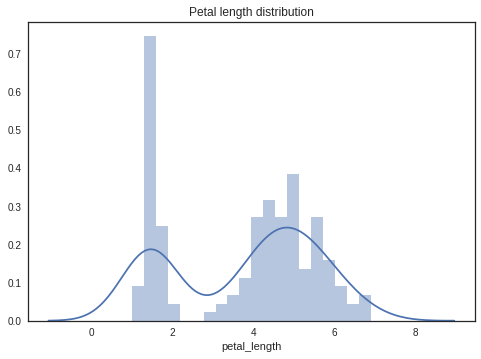

In [52]:
sns.distplot(df.petal_length, bins=20,)
plt.title('Petal length distribution')

In [45]:
iris_melt = pd.melt(df, "species", var_name="measurement")

In [46]:
iris_melt.head()

,species,measurement,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


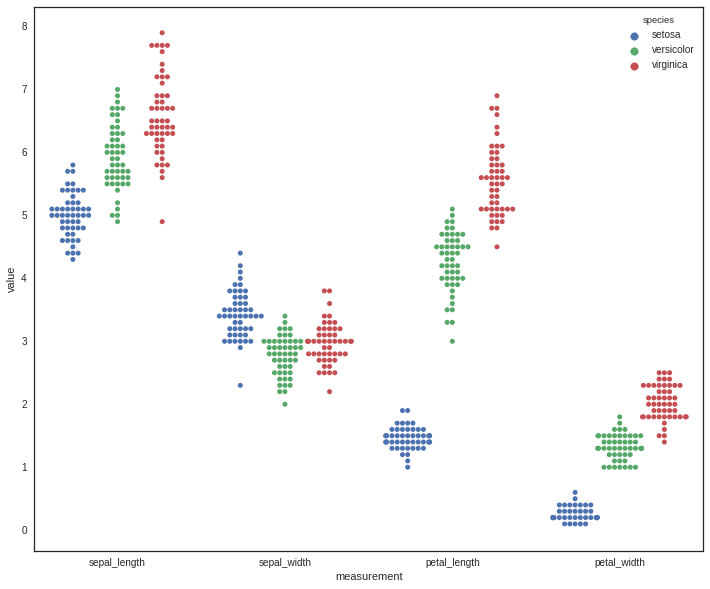

In [51]:
plt.figure(figsize=(12,10))
sns.swarmplot(x="measurement", y="value", hue="species", data=iris_melt, split=1, )